In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Bringing the data from kaggle and unzipping
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/AIDocAssist/fracture_detection/kaggle.json ~/.kaggle/
!kaggle datasets download -d srinivasvishal7/fracture
!unzip /content/fracture.zip

 85% 16.0M/18.8M [00:00<00:00, 74.6MB/s]
100% 18.8M/18.8M [00:00<00:00, 85.7MB/s]
Archive:  /content/fracture.zip
  inflating: fracture/training/0.jpg  
  inflating: fracture/training/1.jpg  
  inflating: fracture/training/10.jpg  
  inflating: fracture/training/100.jpg  
  inflating: fracture/training/101.jpg  
  inflating: fracture/training/102.jpg  
  inflating: fracture/training/103.jpg  
  inflating: fracture/training/104.jpg  
  inflating: fracture/training/105.jpg  
  inflating: fracture/training/106.jpg  
  inflating: fracture/training/107.jpg  
  inflating: fracture/training/108.jpg  
  inflating: fracture/training/109.jpg  
  inflating: fracture/training/11.jpg  
  inflating: fracture/training/110.jpg  
  inflating: fracture/training/111.jpg  
  inflating: fracture/training/112.jpg  
  inflating: fracture/training/113.jpg  
  inflating: fracture/training/114.jpg  
  inflating: fracture/training/115.jpg  
  inflating: fracture/training/116.jpg  
  inflating: fracture/training/

In [3]:
DRIVE_PATH = "/content/drive/MyDrive/AIDocAssist/fracture_detection/"
DATASET_PATH = "/content/fracture/"

In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [5]:
train_df = pd.read_csv(DRIVE_PATH+"train_df2.csv")
validation_df = pd.read_csv(DRIVE_PATH+"validation_df2.csv")

In [6]:
train_df.head(1)

,filename,width,height,center_x,center_y,b_width,b_height
0,training/229.jpg,800,1093,0.469375,0.689387,0.09875,0.070448


In [7]:
validation_df.head(1)

,filename,width,height,center_x,center_y,b_width,b_height
0,validation/16.jpg,226,299,0.471239,0.586957,0.234513,0.29097


In [ ]:
def load_img(filename, box_values):
  img = tf.io.decode_jpeg(tf.io.read_file(DATASET_PATH+filename), channels=3)
  img = tf.image.resize(img, (256,256))
  img = preprocess_input(img)
  return img, box_values

In [ ]:
train_dataset = tf.data.Dataset\
                    .from_tensor_slices((train_df["filename"].values, train_df.loc[:, "center_x":].values))\
                    .cache()\
                    .map(load_img, num_parallel_calls= tf.data.AUTOTUNE)\
                    .shuffle(buffer_size=1024)\
                    .batch(8)\
                    .prefetch(tf.data.AUTOTUNE)
validation_dataset = tf.data.Dataset\
                          .from_tensor_slices((validation_df['filename'].values, validation_df.loc[:, "center_x":].values))\
                          .cache()\
                          .map(load_img, num_parallel_calls= tf.data.AUTOTUNE)\
                          .shuffle(buffer_size=1024)\
                          .batch(8)\
                          .prefetch(tf.data.AUTOTUNE)

In [ ]:
# Model
# input = layers.Input(shape=(256,256,3), name='preprocessed_input')
# tower_1 = layers.Conv2D(32, 3, padding="same", activation="relu")(input)
# tower_1 = layers.Conv2D(32, 1, padding="same", activation="relu")(tower_1)

# tower_2 = layers.Conv2D(32, 5, padding="same", activation="relu")(input)
# tower_2 = layers.Conv2D(32, 1, padding="same", activation="relu")(tower_2)

# tower_3 = layers.Conv2D(32, 7, padding="same", activation="relu")(input)
# tower_3 = layers.Conv2D(32, 1, padding="same", activation="relu")(tower_3)

# x = layers.Concatenate()([tower_1,tower_2, tower_3])
# x = layers.Dense(128)(x)
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(32)(x)
# output = layers.Dense(4, activation="linear", name="box_values")(x)

# train_model = tf.keras.Model(inputs=input, outputs=output)


In [ ]:
# Resnet50
# resnet50 = ResNet50(include_top=False, input_shape=(256,256,3))

# input = layers.Input(shape=(256,256,3), name='preprocessed_input')
# res_out = resnet50(input)
# x = layers.GlobalAveragePooling2D()(res_out)
# x = layers.Dense(32)(x)
# output = layers.Dense(4, activation="linear", name="box_values")(x)

# train_model = tf.keras.Model(inputs=input, outputs=output)

In [ ]:
train_model = tf.keras.models.load_model(DRIVE_PATH+"train_model")

In [ ]:
train_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")

In [ ]:
train_model.fit(train_dataset, epochs=100, validation_data=validation_dataset)

Epoch 1/100
37/37 [==============================] - 14s 168ms/step - loss: 1.3396 - val_loss: 11159.6328
Epoch 2/100
37/37 [==============================] - 7s 141ms/step - loss: 0.0448 - val_loss: 3.5056
Epoch 3/100
37/37 [==============================] - 7s 142ms/step - loss: 0.0266 - val_loss: 0.8314
Epoch 4/100
37/37 [==============================] - 7s 141ms/step - loss: 0.0177 - val_loss: 0.2141
Epoch 5/100
37/37 [==============================] - 7s 142ms/step - loss: 0.0167 - val_loss: 0.0158
Epoch 6/100
37/37 [==============================] - 7s 142ms/step - loss: 0.0105 - val_loss: 0.0118
Epoch 7/100
37/37 [==============================] - 7s 143ms/step - loss: 0.0100 - val_loss: 0.0120
Epoch 8/100
37/37 [==============================] - 7s 143ms/step - loss: 0.0130 - val_loss: 0.0080
Epoch 9/100
37/37 [==============================] - 7s 144ms/step - loss: 0.0145 - val_loss: 0.0152
Epoch 10/100
37/37 [==============================] - 7s 145ms/step - loss: 0.0135 - v

In [ ]:
train_model.save(DRIVE_PATH+"train_model2")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AIDocAssist/fracture_detection/train_model2/assets


In [ ]:
input= layers.Input(shape=(None, None, 3)) 
x = layers.Resizing(256, 256) (input)
output = preprocess_input(x)
preprocessing = tf.keras.Model(inputs=input, outputs=output)

In [ ]:
input = layers.Input(shape=(None, None, 3))
processed = preprocessing(input)
output = train_model(processed)

inference_model = tf.keras.Model(inputs=input, outputs=output)

In [8]:
inference_model = tf.keras.models.load_model(DRIVE_PATH+"inference_model2")

training/14.jpg


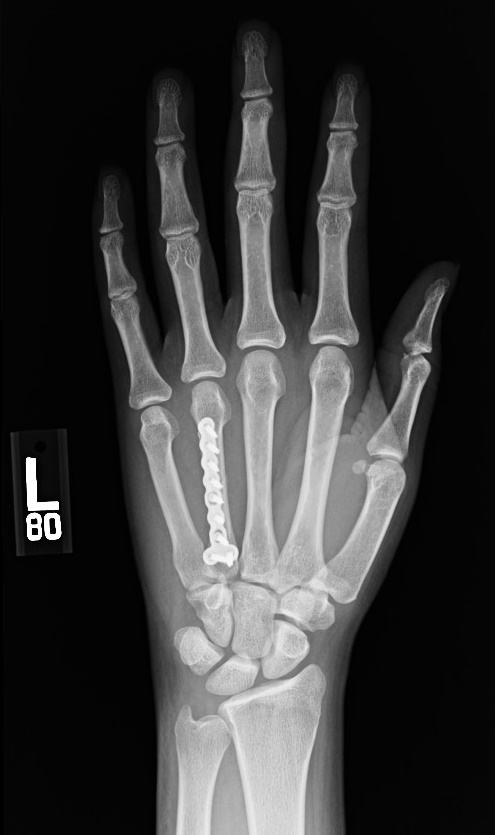

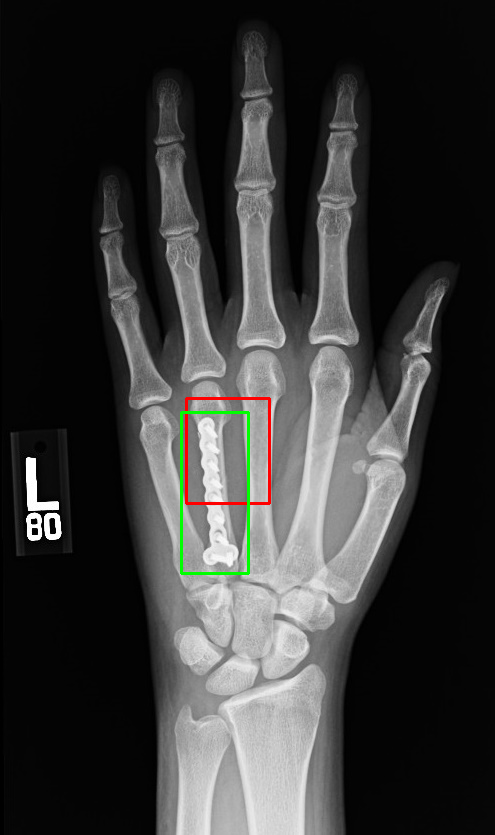

In [24]:
import cv2
from google.colab.patches import cv2_imshow

def get_bndbox(im_width, im_height, center_x, center_y, b_width, b_height):
  xmin = int(center_x*im_width-b_width*im_width/2)
  xmax = int(center_x*im_width+b_width*im_width/2)
  ymin = int(center_y*im_height-b_height*im_height/2)
  ymax = int(center_y*im_height+b_height*im_height/2)
  return xmin, ymin, xmax, ymax

i=18
img = cv2.imread(DATASET_PATH + train_df.iloc[i, :]['filename'])
print(train_df.iloc[i, :]['filename'])
cv2_imshow(img)
center_x, center_y, b_width, b_height = inference_model(tf.constant([img])).numpy()[0]
xmin, ymin, xmax, ymax = get_bndbox(img.shape[1], img.shape[0], center_x, center_y, b_width, b_height)
# xmin, ymin, xmax, ymax = int(xmin * validation_df.iloc[i, :]['width']/10), int(ymin * validation_df.iloc[i, :]['height']/10), int(xmax * validation_df.iloc[i, :]['width']/10), int(ymax * validation_df.iloc[i, :]['height']/10)
a_xmin, a_ymin, a_xmax, a_ymax = get_bndbox(img.shape[1], img.shape[0], train_df.iloc[i,:]['center_x'], train_df.iloc[i,:]['center_y'], train_df.iloc[i,:]['b_width'], train_df.iloc[i,:]['b_height'])
img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,0,255), 2)
cv2_imshow(cv2.rectangle(img, (a_xmin, a_ymin), (a_xmax, a_ymax), (0,255,0), 2))

In [ ]:
inference_model.save(DRIVE_PATH+"inference_model2")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AIDocAssist/fracture_detection/inference_model2/assets
